# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for Dataframes

import visuals as vs
%matplotlib inline

#Load the wholesale customers dataset
try:
    data = pd.read_csv('customers.csv')
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print('Wholesale customers dataset has {} samples with {} features each.'.format(*data.shape))
except:
    print('Dataset could not be loaded. Is the dataset missing?')
    
data.head()

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#Select three indices of your choice to sample from dataset
# import random
# indices = random.sample(range(0,440), 3)
# print(indices)

#Choose the 1st datapoint: high fresh food purchase
# df = data[data['Fresh'] > 5*data['Fresh'].mean()]
# df
a = 162

# Choose the 2nd datapoint: high Detergents_Papers purchase
# df = data[data['Detergents_Paper'] > 5*data['Detergents_Paper'].mean()]
# df
b = 61

# Choose the 3rd datapoint: high Delicatessen purchase
# df = data[data['Delicatessen'] > 2*data['Delicatessen'].mean()]
# df
c = 202

indices = [a,b,c]

#Create a Dataframe of chosen samples
samples = pd.DataFrame(data=data.loc[indices], columns=data.keys()).reset_index(drop=True)
print('Chosen samples of wholesale customers dataset:')
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,15177,2024,3810,2665,232,610
1,35942,38369,59598,3254,26701,2017
2,25203,11487,9490,5065,284,6854


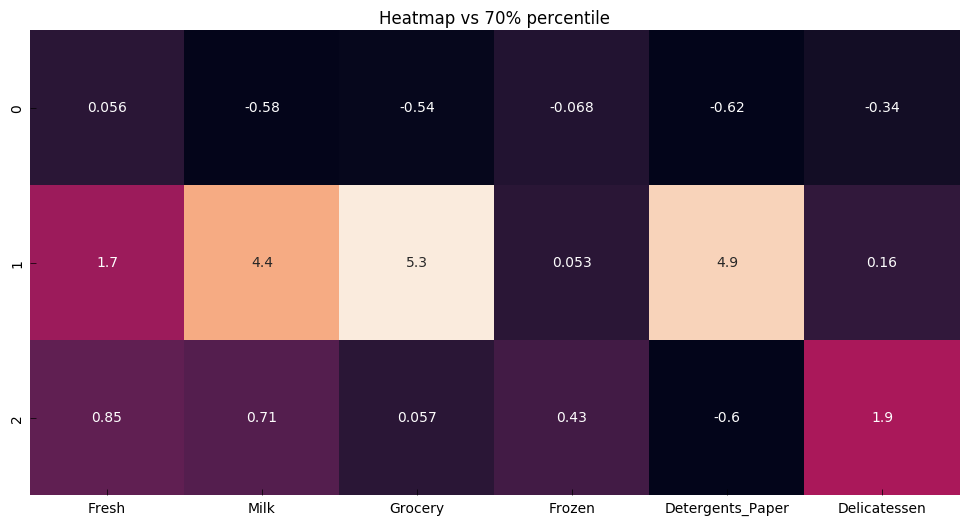

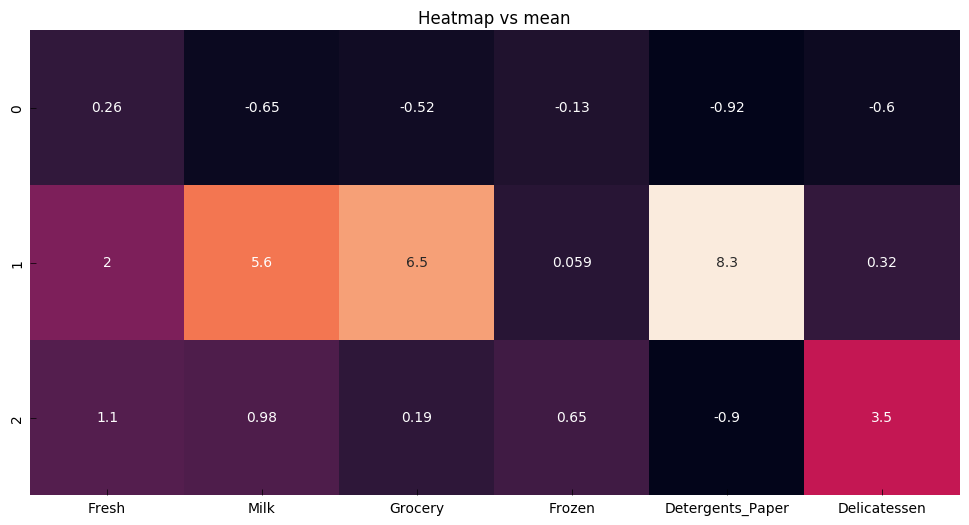

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.axes().set_title('Heatmap vs 70% percentile')
sns.heatmap(data=(samples - data.quantile(q=0.7))/data.std(ddof=0), annot=True, cbar=False, square=True)

plt.figure(figsize=(12, 8))
plt.axes().set_title('Heatmap vs mean')
sns.heatmap(data=(samples - data.mean())/data.mean(), annot=True, cbar=False, square=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
- [0] index 162: Restaurant - The purchase of fresh food is a bit higher than the mean. There is another feature that higher than others that is frozen food. I guess this customer is an owner of a small restaurant or a small cafeteria 
- [1] index 61: Grocery store - The purchase of Detergents_paper, Grocery and Milk are much higher than the average while other product values stay around the average value. I guess this customer is an owner of a large grocery store
- [2] index 202: small delis - The purchase of Delicatessen is significantly higher than the average while other product values stay around the average value. I guess this customer is an owner of a small deli(retail store).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

for feature in features:
    #Make a copy of DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis=1)
    labels = data[feature]
    
    #Split the data into training and testing (0.25) using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=0)
    
    #Create a decision tree regressor and fir it in the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    
    #Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('%s score: %f' % (feature, score))

Fresh score: -0.252470
Milk score: 0.365725
Grocery score: 0.602802
Frozen score: 0.253973
Detergents_Paper score: 0.728655
Delicatessen score: -11.663687


C:\Users\StrikeWade\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


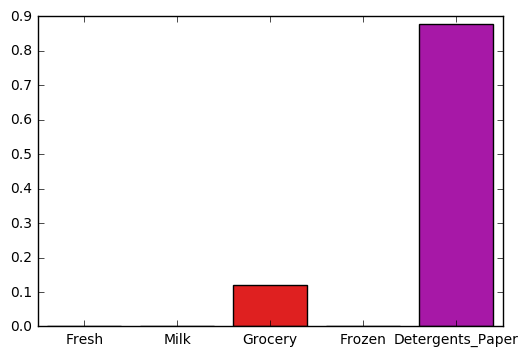

In [6]:
#Check out with features can derive Detergents_paper
new_data = data.drop(feature, axis=1)
labels = data['Detergents_Paper']

X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=0)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

sns.barplot(x=X_train.columns, y=regressor.feature_importances_)

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
- I tried with all featured and the highest R2 score is Detergents_Paper. the second highest is Grocery score
- The prediction score of 'Detergents_Paper' feature is 72.87%
- I think the R2 score in this case perform the correlation of a feature to others. Therefore, this feature(Detergents_Paper) is not necessary for identifying customers' spending habits

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

[[ 1.          0.10050977 -0.01185387  0.34588146 -0.10195294  0.24468997]
 [ 0.10050977  1.          0.72833512  0.12399376  0.66181568  0.40636832]
 [-0.01185387  0.72833512  1.         -0.04019274  0.92464069  0.20549651]
 [ 0.34588146  0.12399376 -0.04019274  1.         -0.13152491  0.39094747]
 [-0.10195294  0.66181568  0.92464069 -0.13152491  1.          0.0692913 ]
 [ 0.24468997  0.40636832  0.20549651  0.39094747  0.0692913   1.        ]]


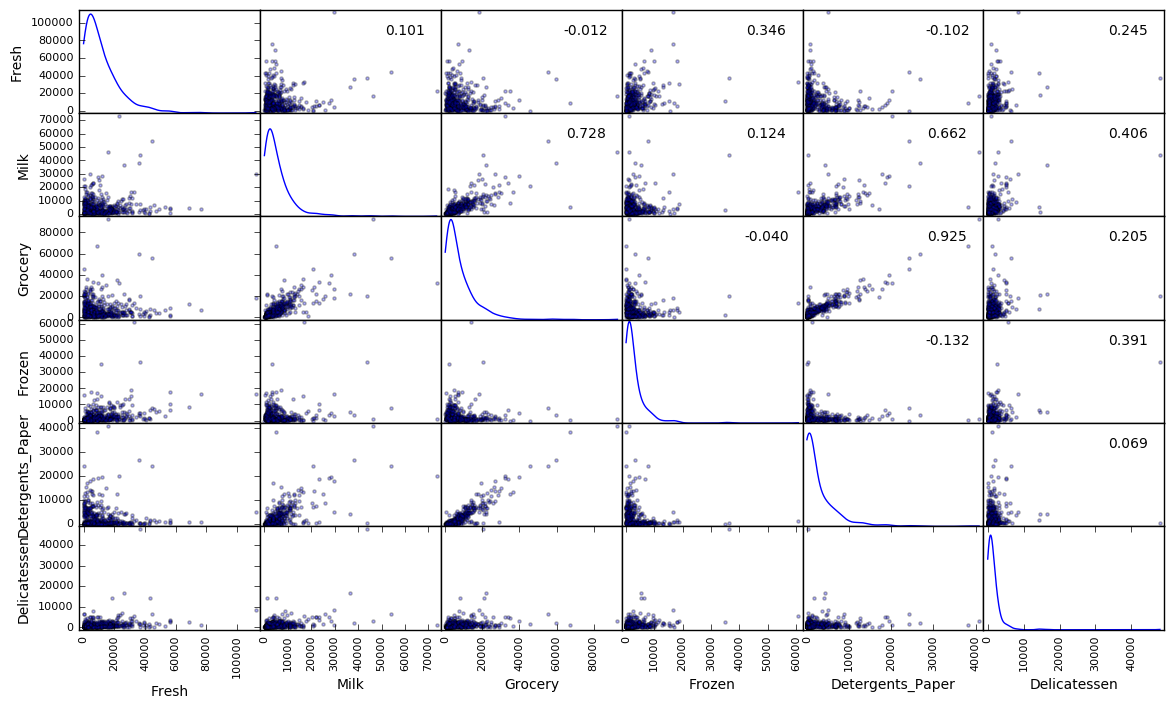

In [10]:
#Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(frame=data, alpha=0.3, figsize=(14,8), diagonal='kde')
corr = data.corr().as_matrix()
print(corr)

for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate('%.3f' %corr[i,j], (0.8,0.8), xycoords='axes fraction', ha='center', va='center')

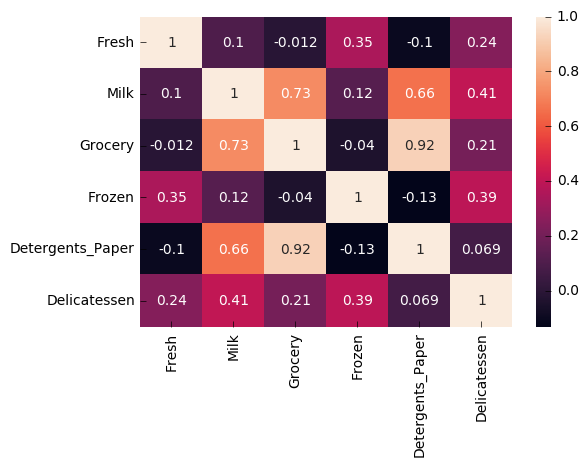

In [13]:
sns.heatmap(data=data.corr(), annot=True)

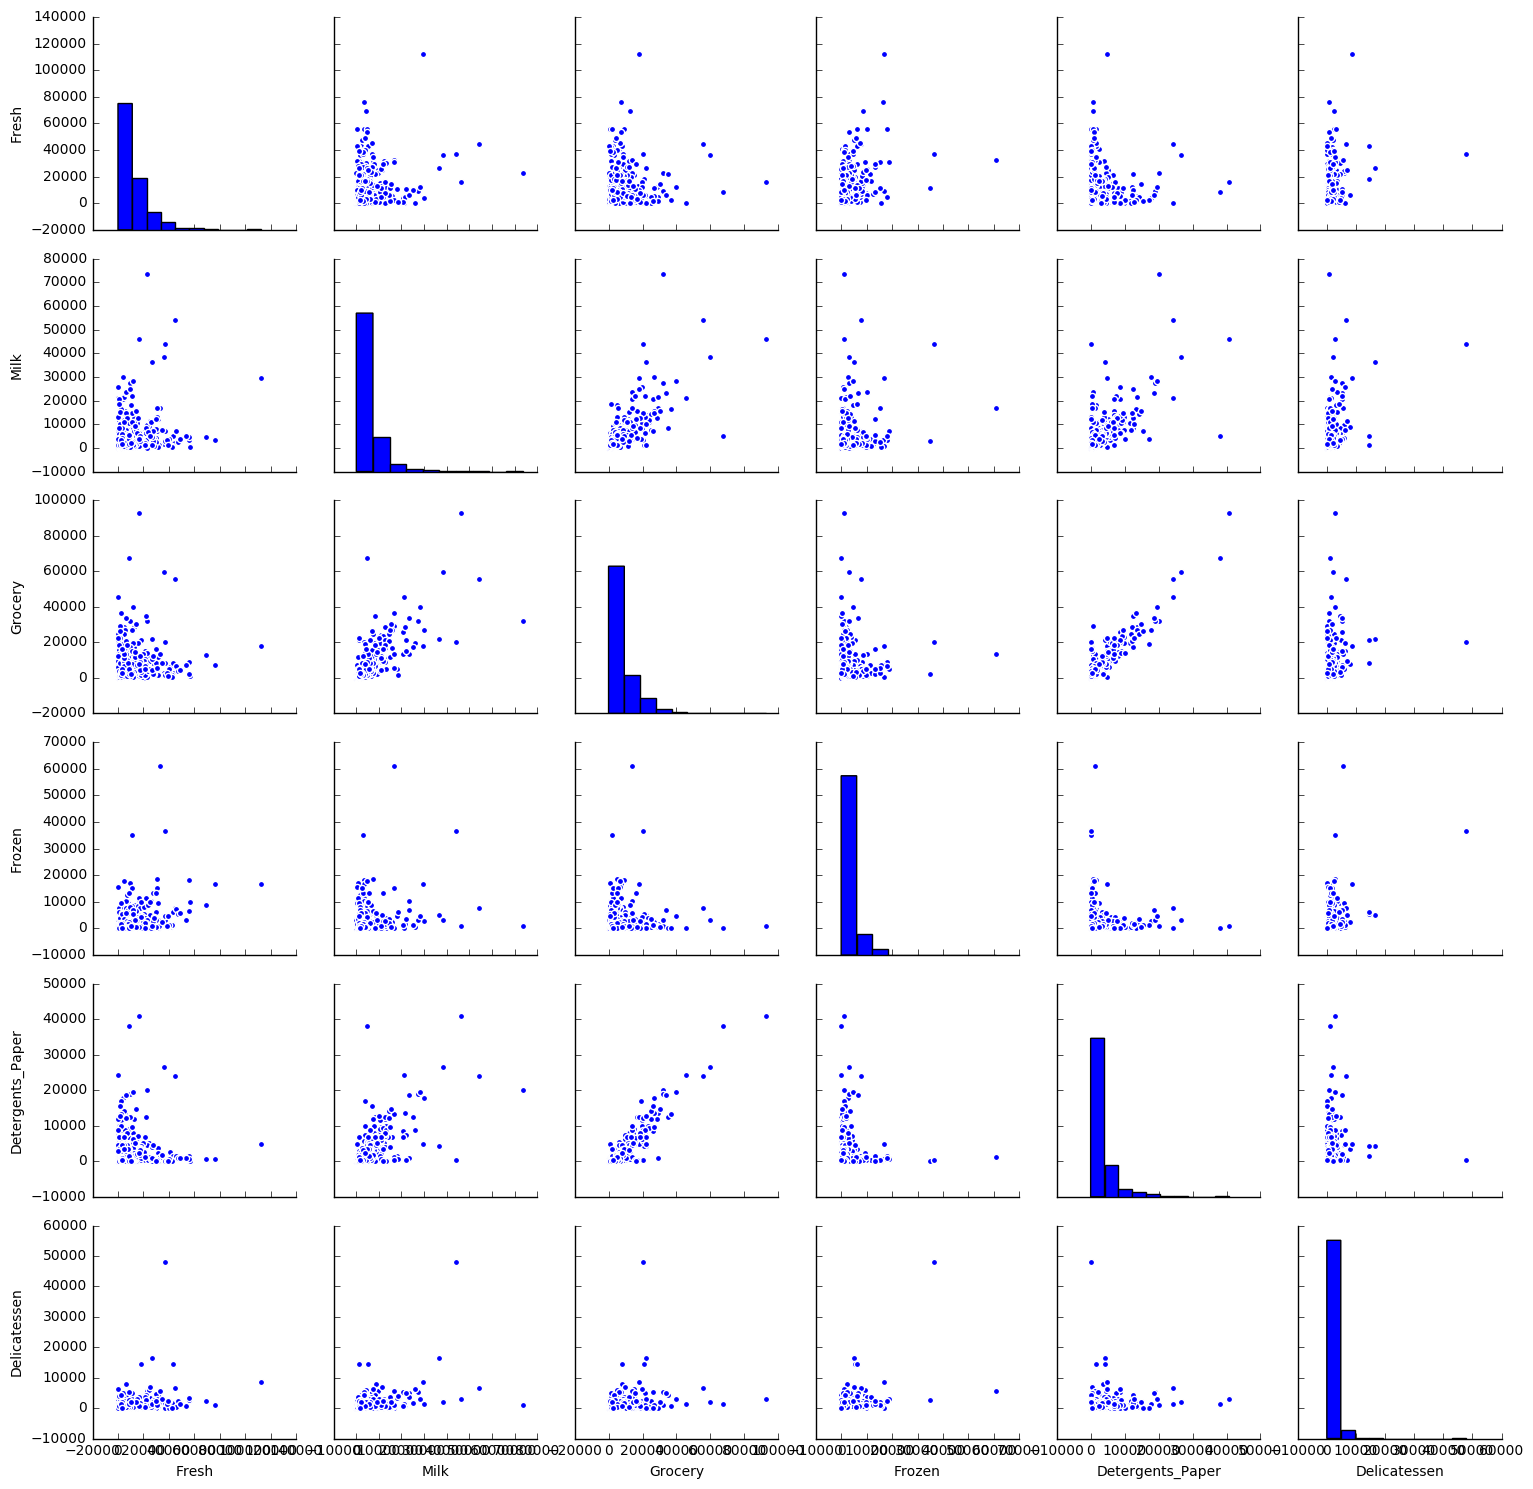

In [15]:
sns.pairplot(data=data)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.


**Answer:**
- According to the scatter matrix, The most correlation pair is Detergents_Paper-Grocery as we can see they forming a linear distribution to each other and the correlation value is 0.92
- Other possibly strong relations are:
    + Grocery - Milk: correlation value is 0.73
    + Detergents_Paper - Milk: correlation value is 0.66
- It confirms my above suspicion that 'Detergents_Paper' is not necessary for identifying customers' spending habits and can be reduced
- The data are distributed toward the origin(value 0). Suppose we try to cluster into 'markets, cafes, delis, wholesale retailers' groups. The data are skewed toward small business

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F2DB3BAC8>,
      dtype=object)

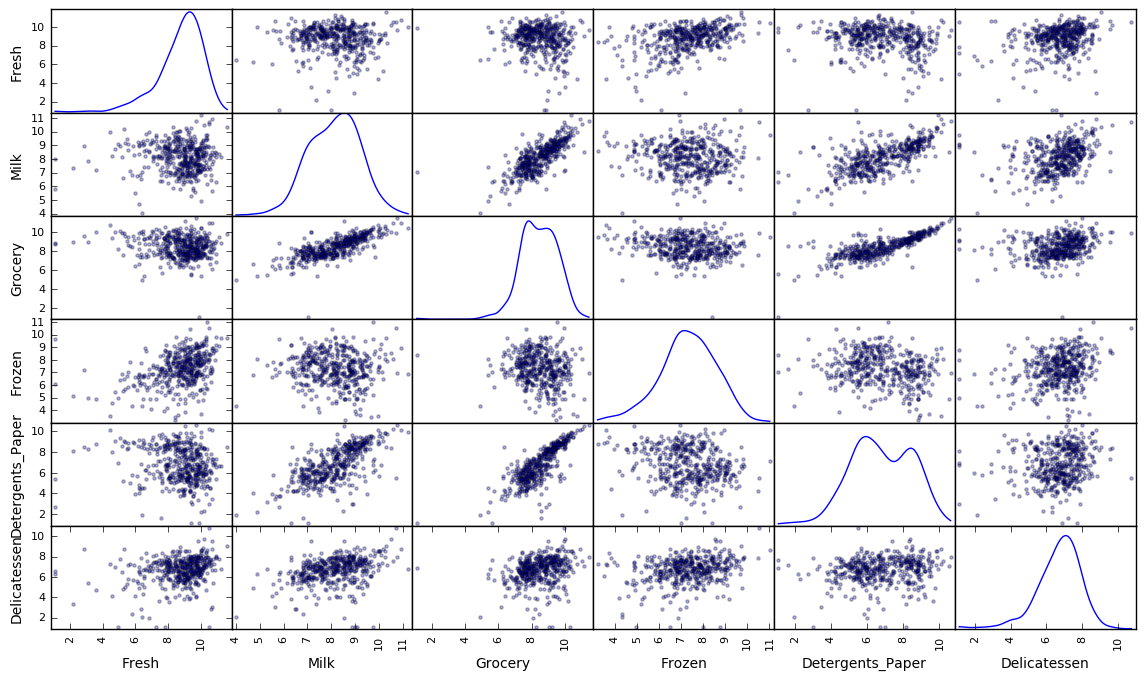

In [20]:
#Scale the data using the natural logarithm
log_data = np.log(data)

#Scale the sample data using the natural logarithm
log_samples = np.log(samples)

#Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(frame=log_data, alpha=0.3, figsize=(14,8), diagonal='kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [21]:
#Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.627536,7.612831,8.245384,7.887959,5.446737,6.413459
1,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
2,10.134718,9.348971,9.157994,8.530109,5.648974,8.832588


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [46]:
#Select the indices for data porints you wish to remove
outliers = []
dup_outliers = dict()

#For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    #Calculate Q1 (25th percentile of data) for the given feature
    Q1 = np.percentile(a=log_data[feature], q=25)
    
    #Calculate Q3 (75th percentile of data) for the given feature
    Q3 = np.percentile(a=log_data[feature], q=75)
    
    #Use interquartie range to calculate an outlier step(1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    #Outliers
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers += set(outlier.index)
    
    #dup_outliers
    for i in list(outlier.index.values):
        if i not in dup_outliers:
            dup_outliers[i] = []
        dup_outliers[i].append(feature)
        
    #Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(outlier)
    
#Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)
print ("Number of outliers (include duplicates): ", len(outliers))
print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of outliers (include duplicates):  48
New dataset with removed outliers has 398 samples with 6 features each.


In [54]:
for k, val in dup_outliers.items():
    if len(val) > 1:
        print("Index %d has duplicated outlier in" % k, val)

Index 128 has duplicated outlier in ['Fresh', 'Delicatessen']
Index 65 has duplicated outlier in ['Fresh', 'Frozen']
Index 66 has duplicated outlier in ['Fresh', 'Delicatessen']
Index 75 has duplicated outlier in ['Grocery', 'Detergents_Paper']
Index 154 has duplicated outlier in ['Milk', 'Grocery', 'Delicatessen']


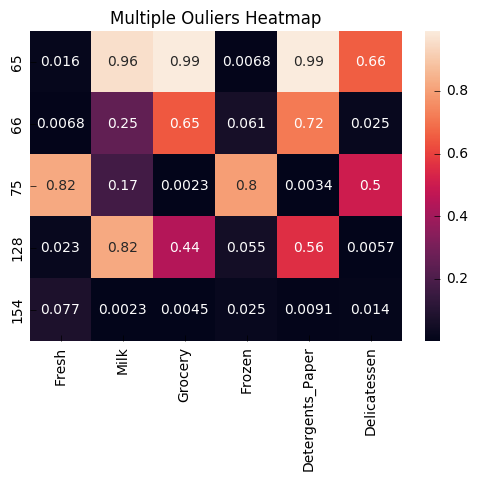

In [63]:
#Heatmap using percentiles to display outlier data
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[[65,66,75,128,154]]
plt.title('Multiple Ouliers Heatmap')
heat = sns.heatmap(percentiles, annot=True)
display(heat)

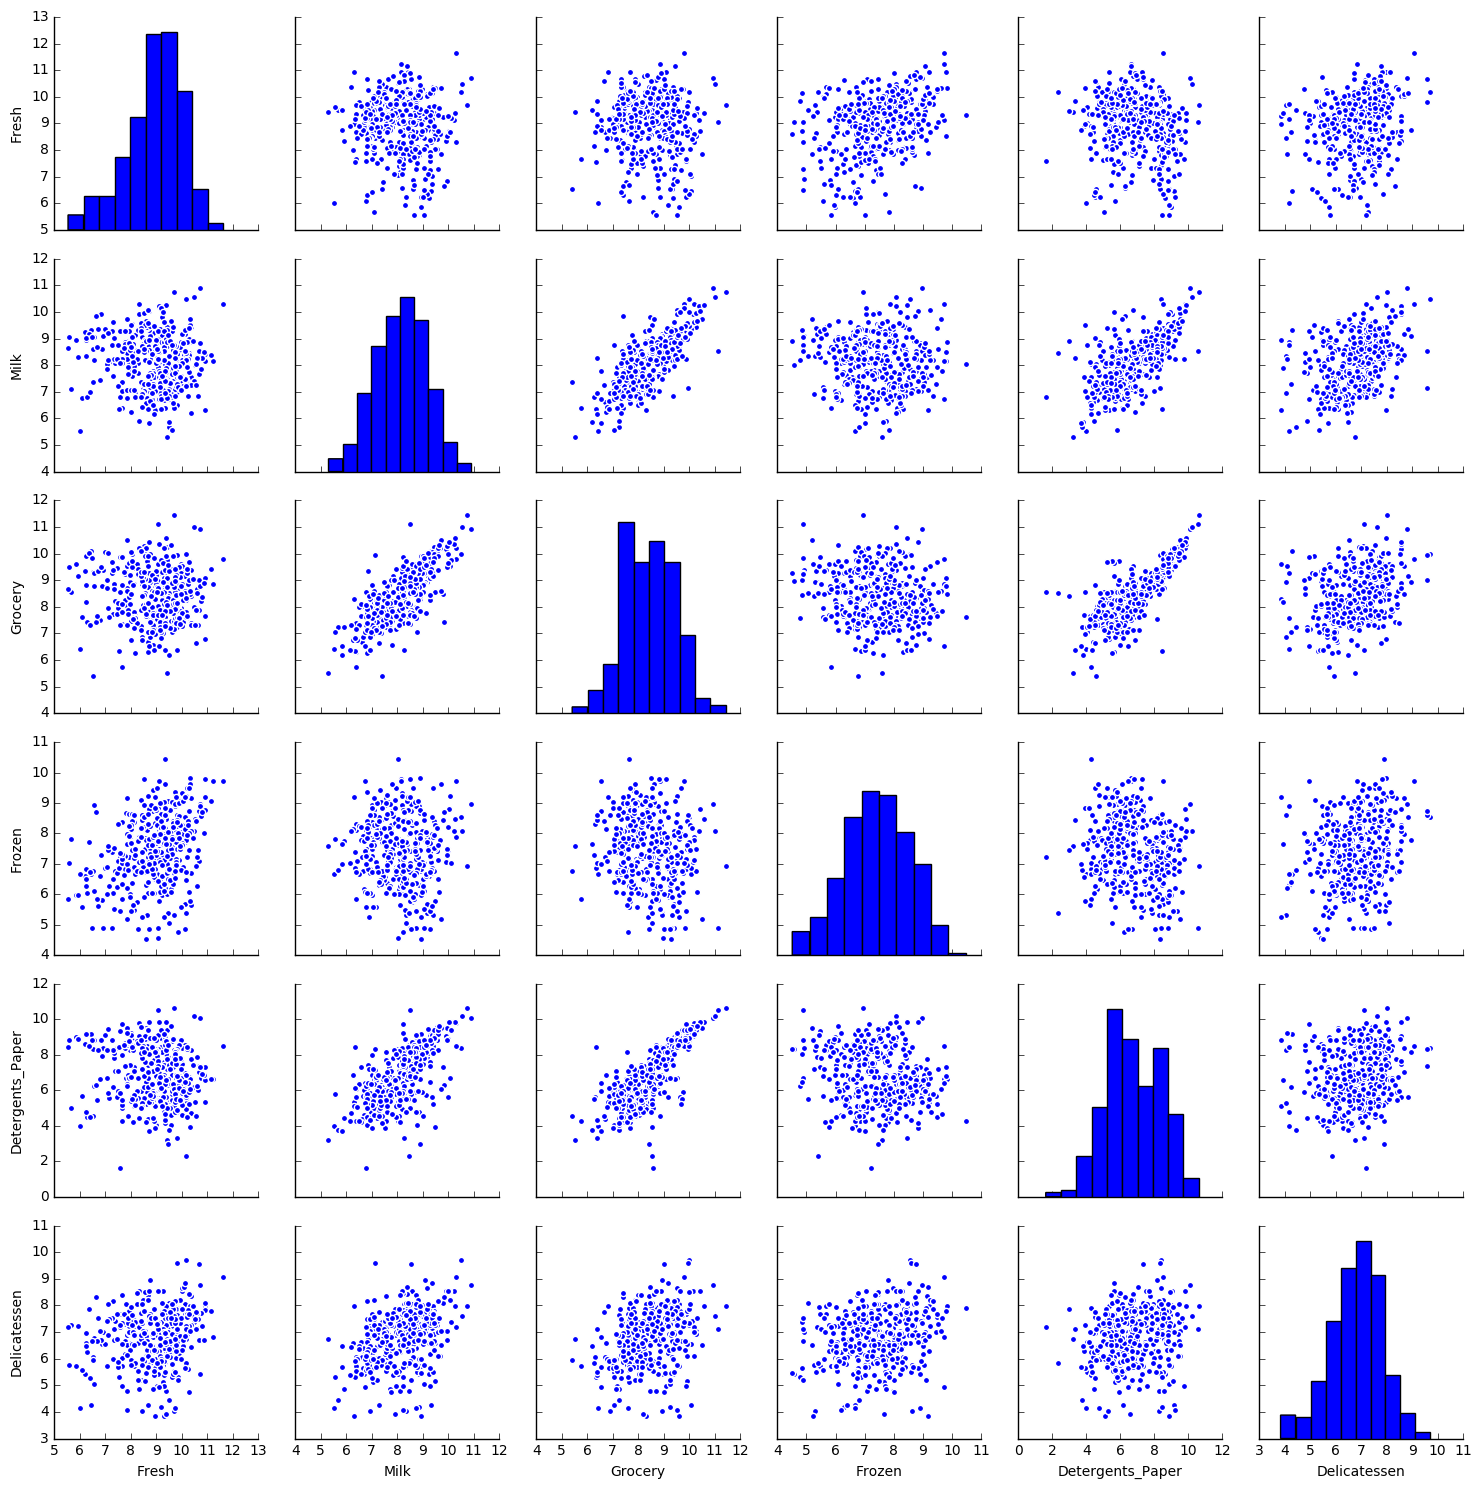

In [65]:
sns.pairplot(good_data)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- There are 5 duplicated outliers
    + 128 has duplicated outlier in 'Fresh' and 'Delicatessen'
    + 154 has duplicated outlier in 'Milk', 'Grocery' and 'Delicatessen'
    + 65 has duplicated outlier in 'Fresh' and 'Frozen'
    + 66 has duplicated outlier in 'Fresh' and 'Delicatessen'
    + 75 has duplicated outlier in 'Grocery' and 'Detergents_Paper'
- The outliers should be removed from the dataset.
- If we choose to apply K mean clustering algorithm which is sensitive to noisy data and outliers then we must remove the outliers. The reason is the K mean clustering would try to optimize the distances between datapoints and the centre of the cluster. If we did not filter the outliers, it would significantly affect the optimal cluster centre cause the algorithm producing wrong results.


Reference: http://www.math.uconn.edu/~gan/ggpaper/gan2017kmor.pdf

---

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


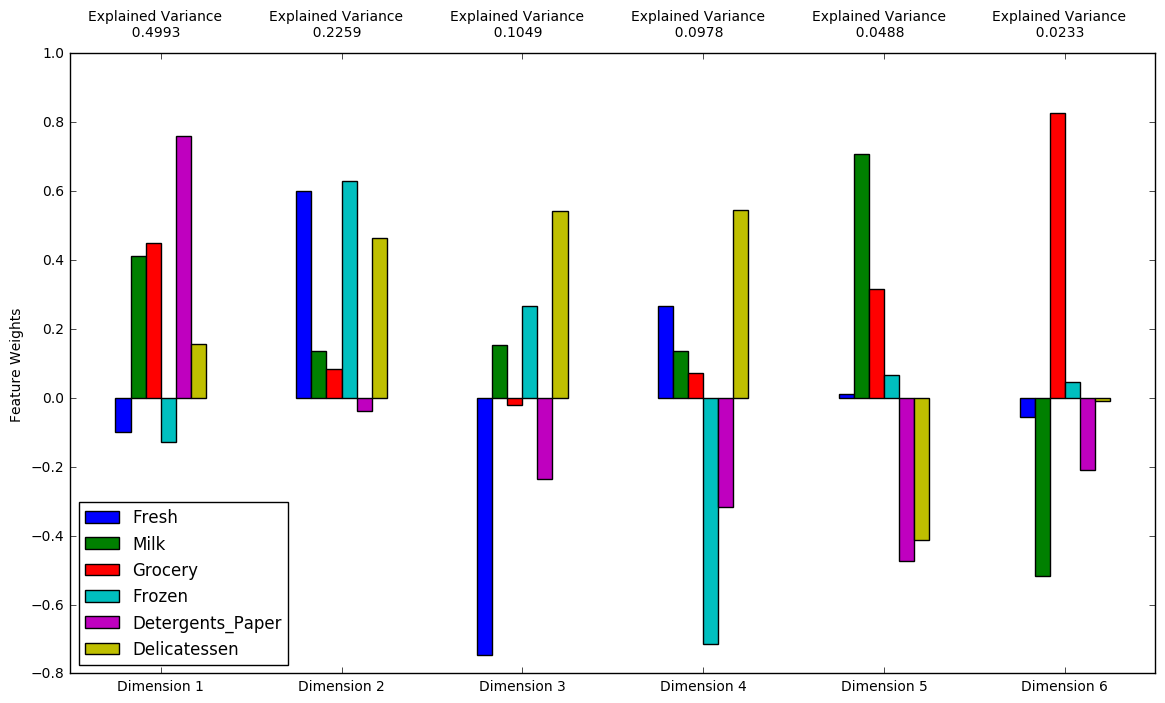

In [70]:
from sklearn.decomposition import PCA

#Apply PCA by fitting the good data with the same num,ber of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

#Transform log_samples using PCA fit above
pca_samples = pca.transform(log_samples)

#Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print(pca_results['Explained Variance'].cumsum())

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.


**Answer:**
- The first component retains 49.93% information of the data
- The second component retains 22.59% information of the data
- The cumulative sum of the first and second components (the combination of the 1st and 2nd dimensions) is 72.52%.
- The first 4 Principal Components retain total 92.79% information of the data


- 1st Component: 
    + positively scaled toward (decreasing) Detergent_papers, Grocery, Milk, Delicatessen
    + negatively scaled toward (decreasing) Fresh, Frozen
    + This seems to represent if a customer is a grocery store owner.
- 2nd Component: 
    + positively scaled toward (decreasing) Frozen, Fresh, Delicatessen, Milk, Grocery
    + negatively scaled toward Detergent_papers
    + This seems to represent if a customer is a restaurant(or cafeteria) owner.
- 3rd Component: 
    + positively scaled toward (decreasing) Delicatessen, Frozen, Milk
    + negatively scaled toward (decreasing) Grocery, Detergent_papers, Fresh
    + This seems to represent if a customer is a deli owner.
- 4th Component: 
    + positively scaled toward (decreasing) Delicatessen, Fresh, Milk, Grocery
    + negatively scaled toward (decreasing) Detergent_papers, Frozen
    + This seems to represent if a customer is a retailer

Rederence: https://www.quora.com/What-is-an-intuitive-explanation-for-PCA

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [77]:
#Display sample log-data after having a PCA transformations applied
display(pd.DataFrame(np.round(pca_samples, 4), columns= pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.4931,0.4923,-0.3651,-0.0122,0.4175,0.3865
1,4.6398,2.1490,-1.0221,-0.1719,0.6589,0.1007
2,0.0357,2.6306,0.9420,1.2220,0.8929,0.1800


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


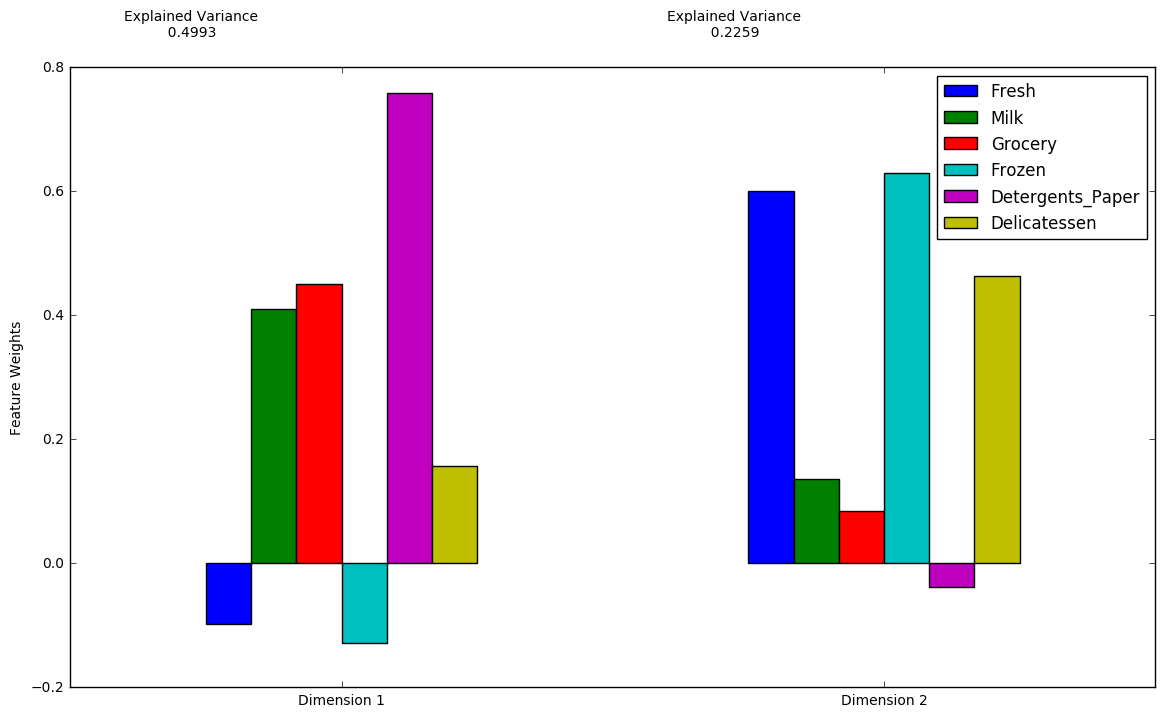

In [85]:
#Apply PCA by fitting the good_data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

#Transform the good_data using the PCA fit above
reduced_data = pca.transform(good_data)

#Transform the log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

#Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [86]:
#Display the sample log_data after applying PCA transformation in two dimensions
display(pd.DataFrame(data=np.round(pca_samples, 4), columns=['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.4931,0.4923
1,4.6398,2.1490
2,0.0357,2.6306


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

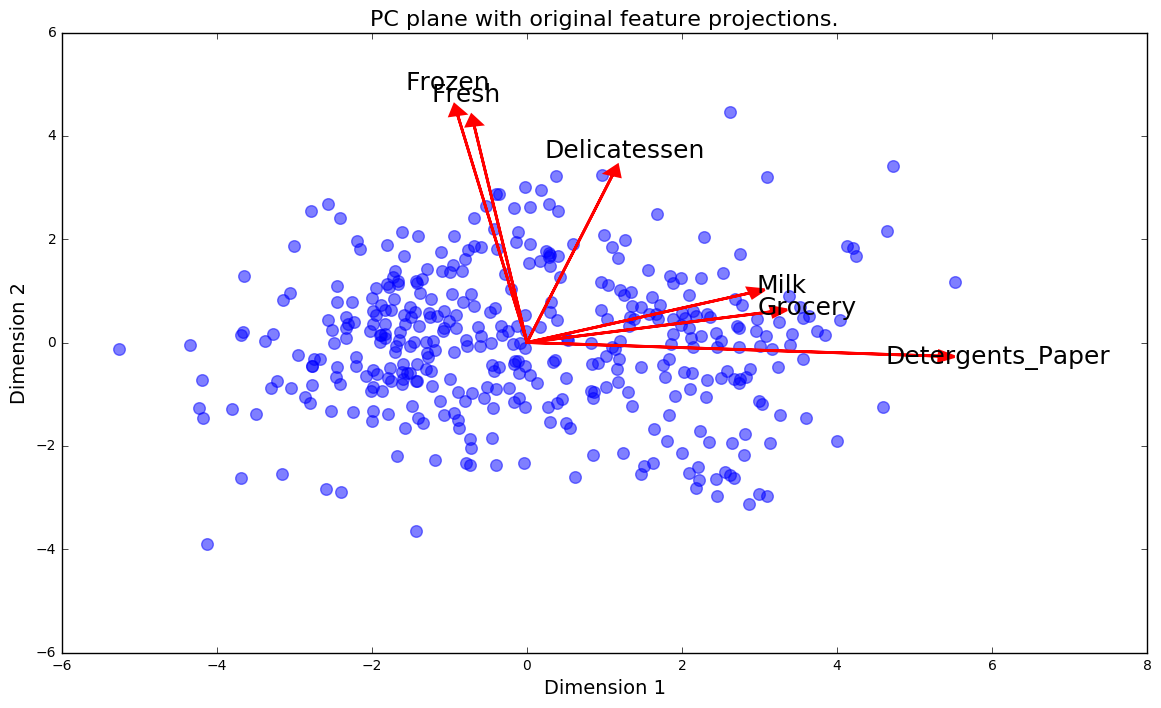

In [87]:
#Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 


### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.


**Answer:**

Model | Definitions | Advantages | Disadvantages
--- | --- | --- | ---
K-Means clustering | Minimize distances between samples and centroids, optimize the place of the centroids, hard assigning of datapoints| low runtime, better for high dimensional data, easy implement| assumes clusters as spherical -> not work well with complex geometrical data (non linear), hard assignment leads to misgroup
Gaussian Mixture Model  | Use probabilities of a sample to determine which cluster it belonging to | Work well with nonlinear geometrical data shape | high dimensional data cause difficulties

- As observing the data shape is not spherical and the data dimension is low, I choose the GMM for implementation

References:

https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
import warnings
warnings.filterwarnings('ignore')   - Assign the silhouette score to `score` and print the result.

Number of clusters 2 - Score: 0.443601
Number of clusters 3 - Score: 0.357295
Number of clusters 4 - Score: 0.291646
Number of clusters 5 - Score: 0.265822
Number of clusters 6 - Score: 0.307123
Number of clusters 7 - Score: 0.295333
Number of clusters 8 - Score: 0.301156
Number of clusters 9 - Score: 0.283717
Number of clusters 10 - Score: 0.262954
Number of clusters 11 - Score: 0.216130
Number of clusters 12 - Score: 0.181104
Number of clusters 13 - Score: 0.118361
Number of clusters 14 - Score: 0.142389
Number of clusters 15 - Score: 0.194378
Number of clusters 16 - Score: 0.144161
Number of clusters 17 - Score: 0.140768
Number of clusters 18 - Score: 0.153723
Number of clusters 19 - Score: 0.134812


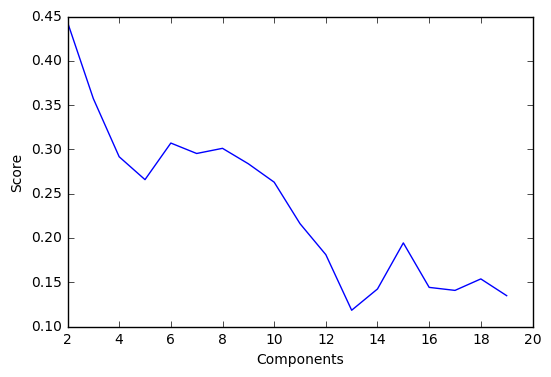

In [94]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

x = []
y = []

def yieldGMM(k):
    
    #Apply your clustering algorithm of choice to reduced data
    clusterer = GMM(n_components=k, random_state=0)
    clusterer.fit(reduced_data)
    
    #Predict the cluster for each data poing
    preds = clusterer.predict(reduced_data)
    
    #Find the cluster centers
    centers = clusterer.means_
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X=reduced_data, labels=preds)
    return score, preds, centers, sample_preds


for k in range(2,20):
    score, preds, centers, sample_preds = yieldGMM(k)
    print('Number of clusters %d - Score: %f' % (k, score))
    
    x.append(k)
    y.append(score)
    
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, y)
plt.xlabel('Components')
plt.ylabel('Score')
plt.show()

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?


**Answer:**
- The number of clusters has the best silhouette score is 2 with the score of 0.443601


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

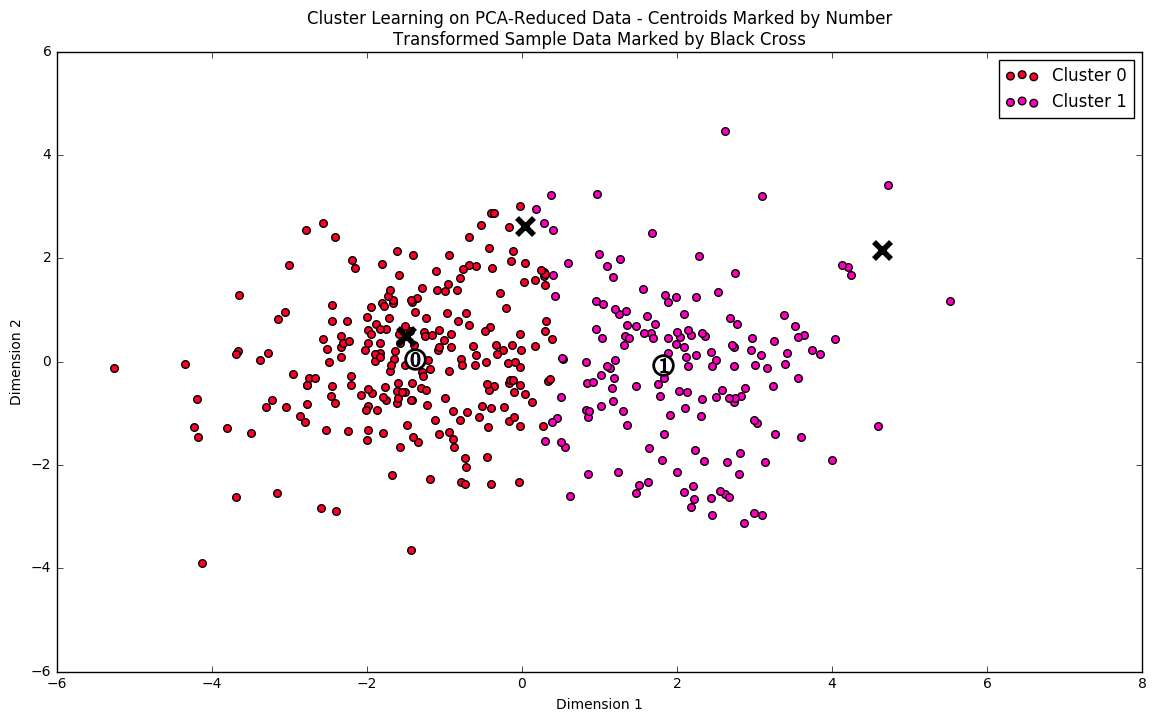

In [95]:
#Display the results of the clustering from implementation
score, preds, centers, sample_preds = yieldGMM(2)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [106]:
#Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#Exponentiate the centers
true_centers = np.exp(log_centers)

#Display the true centers
segments = ['Segments {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(data=np.round(true_centers), columns=data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segments 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segments 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


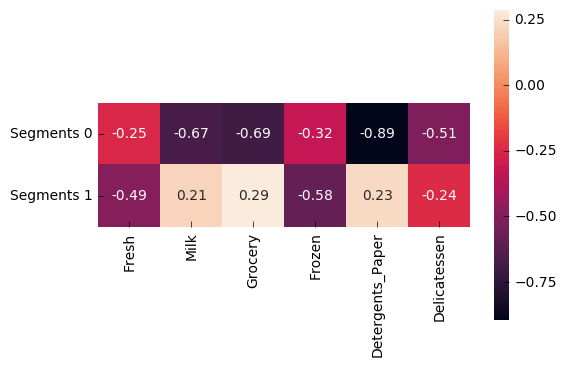

In [107]:
sns.heatmap(data=(true_centers-data.mean())/data.mean(), square=True, annot=True, cbar=True)

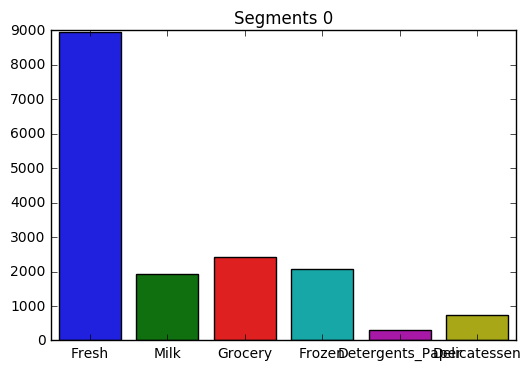

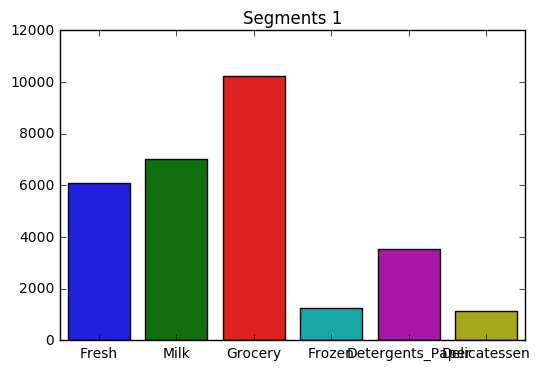

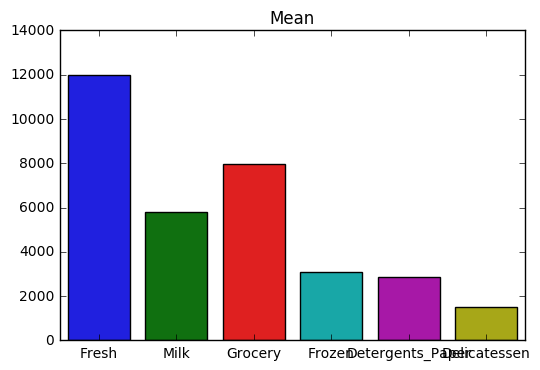

In [114]:
plt.figure()
plt.axes().set_title('Segments 0')
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title('Segments 1')
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[1].values)

plt.figure()
plt.axes().set_title('Mean')
sns.barplot(x=true_centers.columns.values, y=data.describe().loc['mean'].values)

In [115]:
from scipy.stats import percentileofscore

for idx in true_centers.index:
    print(str(idx) + ' centroid percentiles: ')
    for col in data.columns.values:
        print(' {} is at {}'.format(col, int(percentileofscore(data[col], true_centers.loc[idx, col]))))

Segments 0 centroid percentiles: 
 Fresh is at 52
 Milk is at 31
 Grocery is at 29
 Frozen is at 58
 Detergents_Paper is at 28
 Delicatessen is at 41
Segments 1 centroid percentiles: 
 Fresh is at 39
 Milk is at 73
 Grocery is at 73
 Frozen is at 44
 Detergents_Paper is at 72
 Delicatessen is at 58


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
- Based on the percentile analysis
    + Fresh: Segment 0 has more percentile score than Segment 1 (52 vs 39) but not much
    + Milk: Segment 1 has more percentile score than Segment 0 significantly (73 vs 31)
    + Grocery: Segment 1 has more percentile score than Segment 0 significantly (73 vs 29)
    + Frozen: Segment 0 has more percentile score than Segment 1  (58 vs 44)  but not much
    + Detergents_Paper: Segment 1 has more percentile score than Segment 0 significantly (72 vs 28)
    + Delicatessen: Segment 1 has more percentile score than Segment 0  (58 vs 41)  but not much

- So I can conclude that:
    + if customers buy a lot of following products: Detergents_Paper, Grocery, Milk. they would belong to segment 1. I think segment 1 represent a group of grocery stores.
    + if customer buy every products on the amount near the mean but a little higher in Fresh and Frozen food. They would belong to segment 0. I guess segment 0 representing a group of restaurants/ cafeterias.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [116]:
for i, pred in enumerate(sample_preds):
    print('Sample point', i, 'predicted to be in cluster', pred)
    print('The distance between sample point {} and center of cluster {}'.format(i, pred))
    print(samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in cluster 0
The distance between sample point 0 and center of cluster 0
Fresh               6210.0
Milk                 104.0
Grocery             1373.0
Frozen               584.0
Detergents_Paper     -77.0
Delicatessen        -131.0
dtype: float64
Sample point 1 predicted to be in cluster 1
The distance between sample point 1 and center of cluster 1
Fresh               29863.0
Milk                31327.0
Grocery             49357.0
Frozen               1979.0
Detergents_Paper    23155.0
Delicatessen          858.0
dtype: float64
Sample point 2 predicted to be in cluster 0
The distance between sample point 2 and center of cluster 0
Fresh               16236.0
Milk                 9567.0
Grocery              7053.0
Frozen               2984.0
Detergents_Paper      -25.0
Delicatessen         6113.0
dtype: float64


**Answer:**
    - Sample 0 belongs to segment 0 (restaurant/cafeteria) as I predicted
    - Sample 1 belongs to segment 1 (grocery store) as I predicted
    - Sample 2 belongs to segment 0 (restaurant/cafeteria). I predicted it belongs to a small delis business(seems belongs to grocery store than restaurant set) because they spend a lot of money on Delicatessen. Though our model does not well classified based on this feature

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.


### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
- Based on the customer segmentation above, Customers which belongs to segment 0 would react negatively to the new delivery service. By intuition, they need a ton of fresh food so they would prefer the old 5-day delivery scheme
- To test the hypothesis by A/B testing, the distributor can select a small group of customers from each segment and apply the new 3-day delivery scheme then evaluate their feedbacks. Since we separated the customers into 2 segments, we can assume that the change would affect the customers uniformly

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable


**Answer:**
- We can applied the clustering result above as labels(segment 0 and segment 1) for our dataset.
- Then use a supervised learning algorithm to train a classification model
- If we have new customers, then just simply fit them to the classification model to get their labels

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

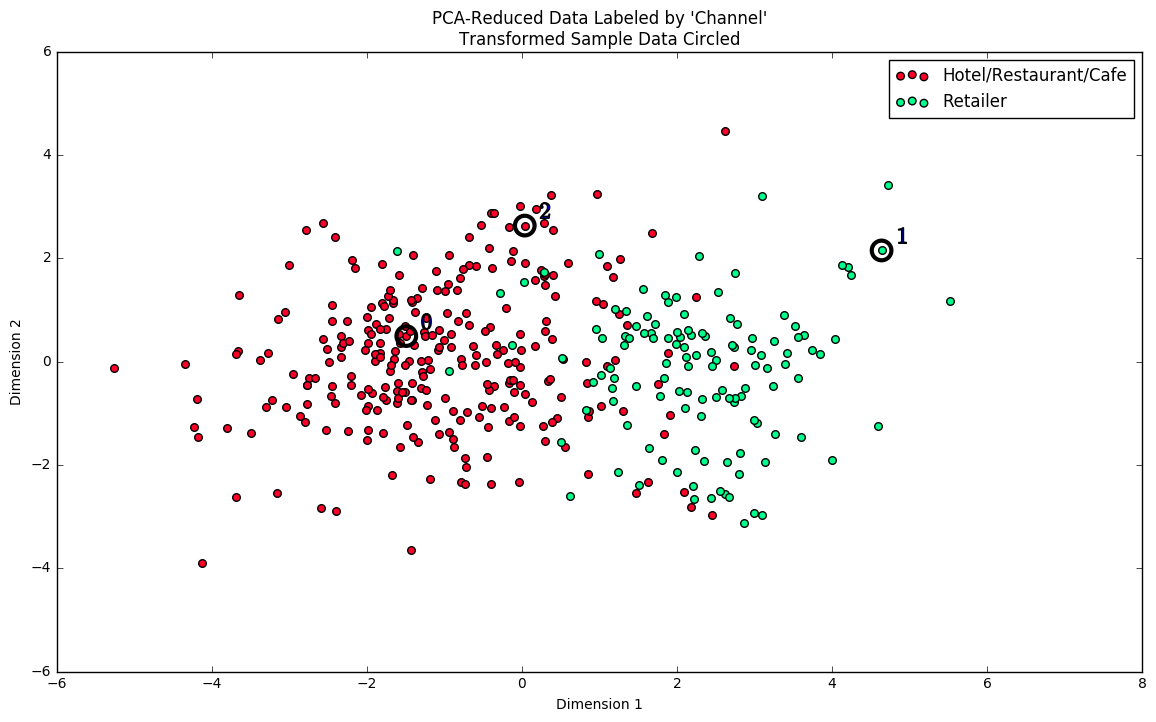

In [117]:
#Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In [133]:
#Find percentage of correctly classified customers
data = pd.read_csv('customers.csv')
data = data.drop(data.index[outliers]).reset_index(drop=True)

#Might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 1, 0) #Replace rows channel=2 => 1 otherwise 0 
print('Percentage of correctly classified customers: {:.2%}'.format(sum(df == preds)/float(len(preds))))

Percentage of correctly classified customers: 87.69%


### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- I think they are very close to each other :D
- My guess for segment 0 is Restaurant - which is Hotel/Restaurant/Cafe, segment 1 is Grocery store - which is Retailers
- Though there are some strange datapoints stay in between of each segmentation but the cluster learning model did work well

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.